In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

In [2]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

[[3.3119065e-09 5.6813551e-08 1.1784240e-05 ... 9.9988914e-01
  1.0265666e-08 5.2585953e-08]
 [1.6012006e-08 2.2009669e-03 9.9771887e-01 ... 1.0054426e-07
  4.0430308e-08 1.6652939e-11]
 [4.6403946e-07 9.9899775e-01 2.4907531e-05 ... 1.9879824e-05
  5.7713431e-04 3.1293926e-06]
 ...
 [4.7872319e-09 3.9142947e-06 9.8889380e-08 ... 2.2520098e-05
  2.9476778e-05 4.8055244e-05]
 [6.5111337e-08 4.3925976e-08 2.1759371e-08 ... 2.0706306e-08
  3.0557712e-05 1.4057692e-09]
 [6.3999454e-07 7.0940544e-08 1.3460534e-07 ... 1.6369044e-09
  3.9267015e-08 1.9021444e-09]]


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
(y_train[0])

<Figure size 640x480 with 1 Axes>

5

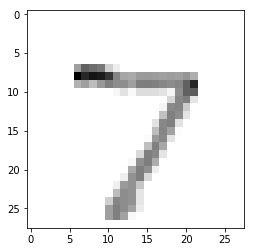

Prediction: 7
Expected Output: 7


In [4]:
import numpy as np


plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()
print("Prediction: {}".format(np.argmax(predictions[0])))
print("Expected Output: {}".format(y_test[0]))

In [8]:
for i in range(len(y_test)):
    print(y_test[i])

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
4
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
2
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
6
6
4
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
8
9
4
0
6


1
3
7
9
0
1
1
4
7
0
8
1
7
4
5
7
1
2
1
1
3
9
6
2
1
2
8
0
7
6
6
9
3
7
0
5
2
8
0
5
4
3
8
4
6
6
2
7
9
5
1
3
2
4
3
6
1
9
4
4
7
6
5
4
1
9
9
2
7
8
0
1
3
6
1
3
4
1
1
1
5
6
0
7
0
7
2
3
2
5
2
2
9
4
9
8
1
2
1
6
1
2
7
8
0
0
0
8
2
2
9
2
2
7
9
9
2
7
5
1
3
4
9
4
1
8
5
6
2
8
3
1
2
8
4
9
9
3
7
0
7
7
2
3
2
4
0
3
9
9
8
4
1
0
6
0
9
6
8
6
1
1
9
8
9
2
3
5
5
9
4
2
1
9
4
3
9
6
0
4
0
6
0
1
2
3
4
7
8
9
0
1
2
3
4
7
8
9
0
1
2
3
4
5
6
7
8
9
8
3
4
7
8
6
3
4
0
9
7
1
9
3
8
4
7
3
0
9
1
4
5
4
6
2
0
6
2
1
1
1
1
7
2
4
7
5
2
9
4
5
8
4
2
9
7
0
0
7
5
1
1
7
6
6
6
8
2
2
7
7
4
0
2
4
2
1
8
9
6
1
0
5
9
6
9
8
0
3
0
8
3
9
6
3
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
5
4
8
7
4
7
7
3
9
8
8
3
1
5
8
2
7
4
2
1
5
4
5
5
8
6
4
4
4
1
8
7
5
5
1
8
9
1
3
6
3
3
2
2
6
9
9
6
5
5
3
3
8
1
6
5
6
8
1
9
7
6
8
3
7
4
7
0
9
0
0
3
7
9
3
0
2
0
1
0
1
0
4
0
1
0
4
7
9
6
2
6
2
2
9
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
8
0
5
6
6
0
8
0
2
3
7
9
4
7
1
9
1
7
1
4
0
0
4
1
7
5
7
1
3
3
3
1
6
9
7
4
3
0
2
5
2
6
0
8
9
4
3
5
4
8
1
5
9
